In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
for column in data.columns:
    data[column] = pd.Categorical(data[column])

# Prepare the features and target
X = pd.get_dummies(data.drop('HeartDisease', axis=1))
y = data['HeartDisease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task A1: Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Task A2: Analyze performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.close()

# Task A3: Visualize the tree (only the first tree in the forest)
plt.figure(figsize=(20,10))
tree = rf_model.estimators_[0]
from sklearn.tree import plot_tree
try:
    plot_tree(tree, filled=True, feature_names=list(X.columns), class_names=['No Heart Disease', 'Heart Disease'], rounded=True)
    plt.savefig('random_forest_tree.png')
    print("Decision tree plot saved as 'random_forest_tree.png'")
except Exception as e:
    print(f"Error creating decision tree plot: {e}")
    print("Tree structure:")
    print(tree.tree_)
plt.close()

# Task A4: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print("Best Model Confusion Matrix:")
print(conf_matrix_best)

# Visualize Best Model Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('best_model_confusion_matrix.png')
plt.close()

Accuracy: 0.8641304347826086
Confusion Matrix:
[[66 11]
 [14 93]]
Decision tree plot saved as 'random_forest_tree.png'
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8760120441619271
Best Model Accuracy: 0.8858695652173914
Best Model Confusion Matrix:
[[66 11]
 [10 97]]


In [9]:
# Task B: Repeat with normalization
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
data_normalized = data.copy()
data_normalized[numerical_features] = scaler.fit_transform(data[numerical_features])

# Prepare the features and target
X_norm = pd.get_dummies(data_normalized.drop('HeartDisease', axis=1))
y_norm = data_normalized['HeartDisease']

# Split the data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model_norm = RandomForestClassifier(random_state=42)
rf_model_norm.fit(X_train_norm, y_train_norm)

# Analyze performance
y_pred_norm = rf_model_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test_norm, y_pred_norm)
conf_matrix_norm = confusion_matrix(y_test_norm, y_pred_norm)

print(f"Normalized Data Accuracy: {accuracy_norm}")
print("Normalized Data Confusion Matrix:")
print(conf_matrix_norm)

# Hyperparameter tuning for normalized data
grid_search_norm = GridSearchCV(estimator=rf_model_norm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_norm.fit(X_train_norm, y_train_norm)

print("Best parameters (normalized):", grid_search_norm.best_params_)
print("Best cross-validation score (normalized):", grid_search_norm.best_score_)

# Evaluate the best model for normalized data
best_model_norm = grid_search_norm.best_estimator_
y_pred_best_norm = best_model_norm.predict(X_test_norm)
accuracy_best_norm = accuracy_score(y_test_norm, y_pred_best_norm)
conf_matrix_best_norm = confusion_matrix(y_test_norm, y_pred_best_norm)

print(f"Best Model Accuracy (normalized): {accuracy_best_norm}")
print("Best Model Confusion Matrix (normalized):")
print(conf_matrix_best_norm)

Normalized Data Accuracy: 0.875
Normalized Data Confusion Matrix:
[[67 10]
 [13 94]]
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters (normalized): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (normalized): 0.8773614363778298
Best Model Accuracy (normalized): 0.8913043478260869
Best Model Confusion Matrix (normalized):
[[67 10]
 [10 97]]


C:\Users\Nilanjan\AppData\Local\Temp\ipykernel_10664\4242601247.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Accuracy: 0.8641304347826086
Confusion Matrix:
[[66 11]
 [14 93]]


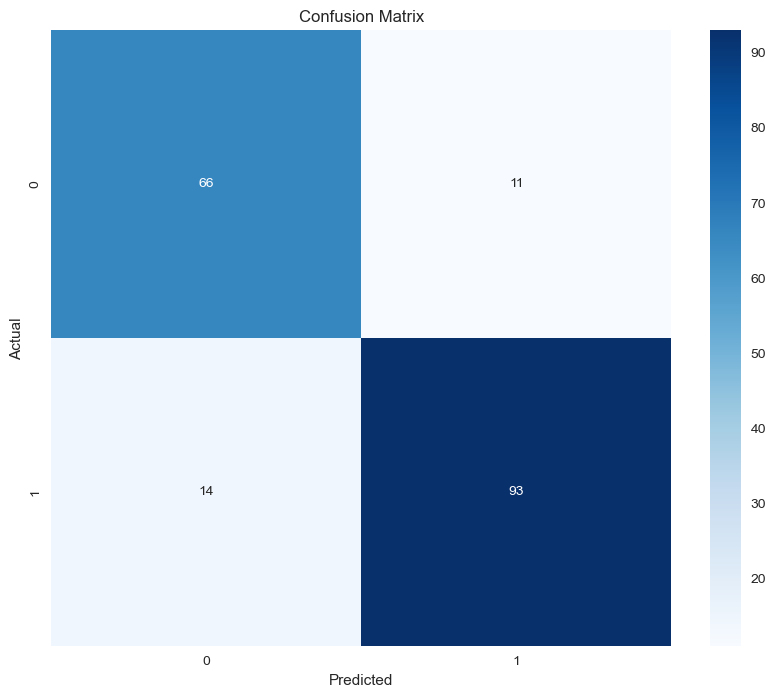

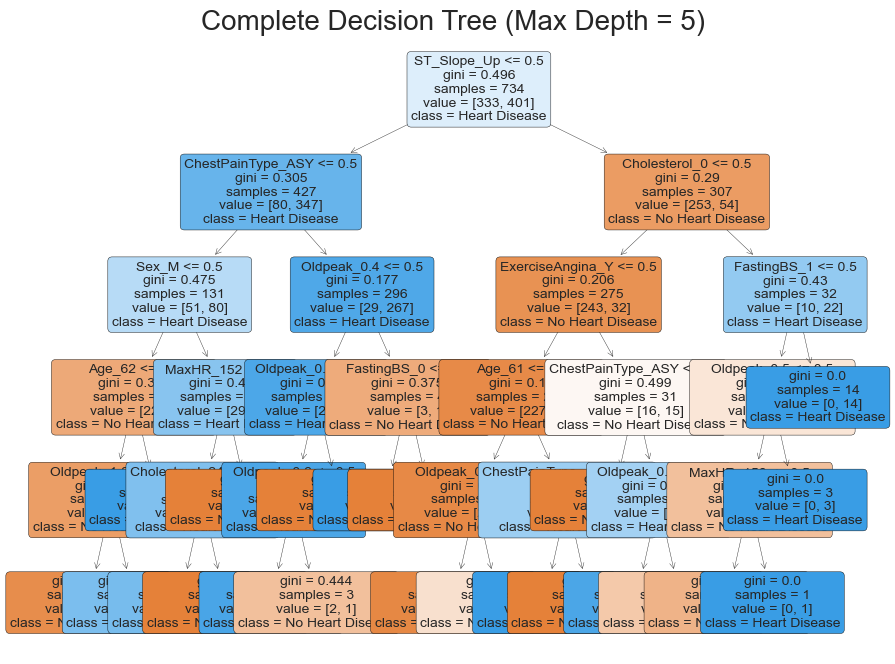

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8760120441619271
Best Model Accuracy: 0.8858695652173914
Best Model Confusion Matrix:
[[66 11]
 [10 97]]


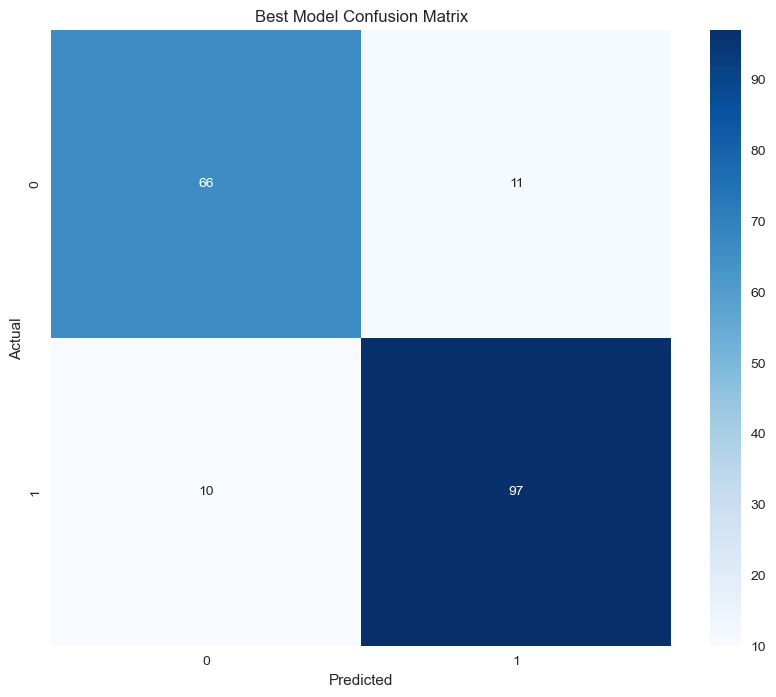

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, DecisionTreeClassifier
%matplotlib inline
plt.style.use('seaborn')

# Convert all columns to categorical
for column in data.columns:
    data[column] = pd.Categorical(data[column])

# Prepare the features and target
X = pd.get_dummies(data.drop('HeartDisease', axis=1))
y = data['HeartDisease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task A1: Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Task A2: Analyze performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Task A3: Visualize the complete tree
# Create a single decision tree with increased depth
complete_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
complete_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_tree(complete_tree, filled=True, feature_names=list(X.columns), 
          class_names=['No Heart Disease', 'Heart Disease'], rounded=True, 
          fontsize=10)
plt.title('Complete Decision Tree (Max Depth = 5)', fontsize=20)
plt.show()

# Task A4: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print("Best Model Confusion Matrix:")
print(conf_matrix_best)

# Visualize Best Model Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ... (Task B code remains the same)

C:\Users\Nilanjan\AppData\Local\Temp\ipykernel_10664\4269588613.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Normalized Data Results:
Accuracy: 0.875
Confusion Matrix:
[[67 10]
 [13 94]]


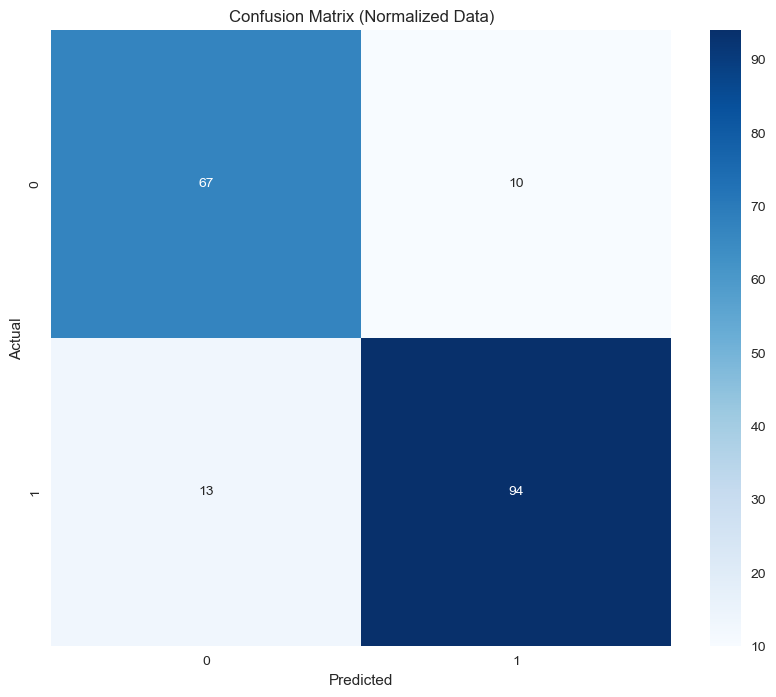

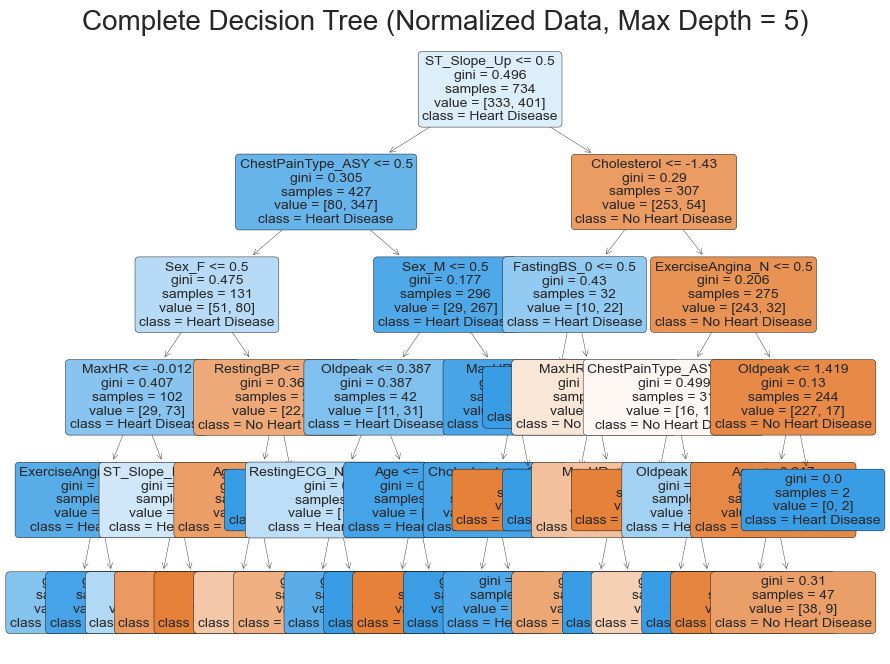

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters (Normalized): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (Normalized): 0.8773614363778298
Best Model Accuracy (Normalized): 0.8913043478260869
Best Model Confusion Matrix (Normalized):
[[67 10]
 [10 97]]


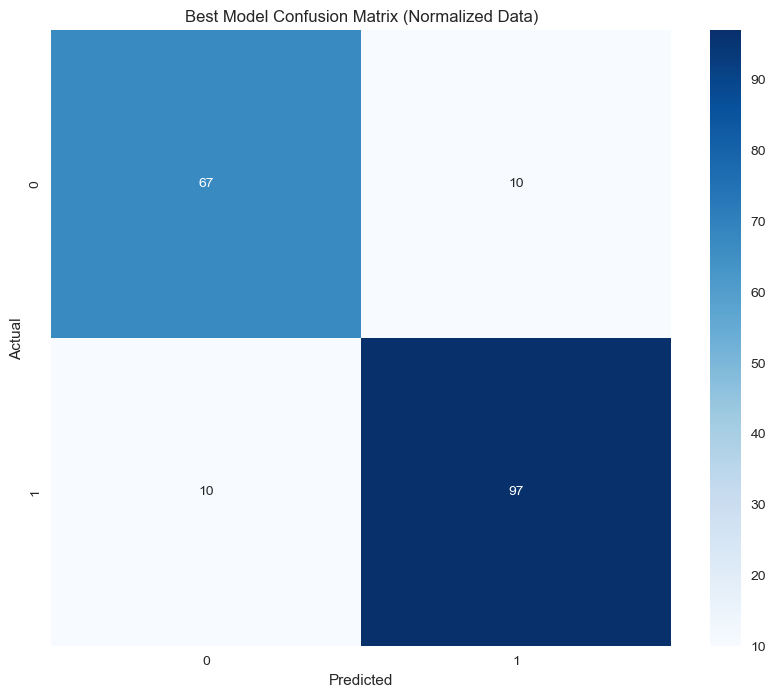

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn')

# Task B: Repeat with normalization

# Identify numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a copy of the data for normalization
data_normalized = data.copy()

# Normalize numerical features
scaler = StandardScaler()
data_normalized[numerical_columns] = scaler.fit_transform(data_normalized[numerical_columns])

# Convert all columns to categorical (except numerical ones)
for column in data_normalized.columns:
    if column not in numerical_columns:
        data_normalized[column] = pd.Categorical(data_normalized[column])

# Prepare the features and target
X_norm = pd.get_dummies(data_normalized.drop('HeartDisease', axis=1))
y_norm = data_normalized['HeartDisease']

# Split the data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model_norm = RandomForestClassifier(random_state=42)
rf_model_norm.fit(X_train_norm, y_train_norm)

# Analyze performance
y_pred_norm = rf_model_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test_norm, y_pred_norm)
conf_matrix_norm = confusion_matrix(y_test_norm, y_pred_norm)

print("Normalized Data Results:")
print(f"Accuracy: {accuracy_norm}")
print("Confusion Matrix:")
print(conf_matrix_norm)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Normalized Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the complete tree
complete_tree_norm = DecisionTreeClassifier(max_depth=5, random_state=42)
complete_tree_norm.fit(X_train_norm, y_train_norm)

plt.figure(figsize=(10, 8))
plot_tree(complete_tree_norm, filled=True, feature_names=list(X_norm.columns), 
          class_names=['No Heart Disease', 'Heart Disease'], rounded=True, 
          fontsize=10)
plt.title('Complete Decision Tree (Normalized Data, Max Depth = 5)', fontsize=20)
plt.show()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_norm = GridSearchCV(estimator=rf_model_norm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_norm.fit(X_train_norm, y_train_norm)

print("Best parameters (Normalized):", grid_search_norm.best_params_)
print("Best cross-validation score (Normalized):", grid_search_norm.best_score_)

# Evaluate the best model
best_model_norm = grid_search_norm.best_estimator_
y_pred_best_norm = best_model_norm.predict(X_test_norm)
accuracy_best_norm = accuracy_score(y_test_norm, y_pred_best_norm)
conf_matrix_best_norm = confusion_matrix(y_test_norm, y_pred_best_norm)

print(f"Best Model Accuracy (Normalized): {accuracy_best_norm}")
print("Best Model Confusion Matrix (Normalized):")
print(conf_matrix_best_norm)

# Visualize Best Model Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best_norm, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model Confusion Matrix (Normalized Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()